# Tranformada Rápida de Fourier (FFT)

|$F_s$|$F_1$|$F_2$|$F_3$|Áudio 1   | Áudio 2 |
|-----|-----|-----|-----|----------|---------|
| 5k  | 500 |1025 | 525 | Violin C4| Flute C4|

In [2]:
# Utils
import scipy.signal.windows as wd
import scipy.fft as sp
import numpy as np

import matplotlib.pyplot as plt

def plot(x, y, title= '', xl='f', yl='|Y|'):
    fig = plt.figure()
    ax  = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)

    plt.plot(x, y)
    plt.grid()
    plt.title(title)
    plt.show()

def plot_stem(x, y, title= '', xl='f', yl='|Y|'):
    fig = plt.figure()
    ax  = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)

    plt.stem(x, y)
    plt.grid()
    plt.title(title)
    plt.show()

def plot_4stem(x, y, title='', sp_titles='', xl='f', yl='|Y|'):
    fig, ax = plt.subplots(2, 2, layout="constrained")
    plt.grid()
    fig.suptitle(title)
    ax[0][0].stem(x[0], y[0])
    ax[0][0].set_title(sp_titles[0])

    plt.grid()
    plt.title(sp_titles[1])
    ax[0][1].stem(x[1], y[1])
    ax[0][1].set_title(sp_titles[1])

    plt.grid()
    plt.title(sp_titles[2])
    ax[1][0].stem(x[2], y[2])
    ax[1][0].set_title(sp_titles[2])

    plt.grid()
    plt.title(sp_titles[3])
    ax[1][1].stem(x[3], y[3])
    ax[1][1].set_title(sp_titles[3])

window_functions = {
    'box' : wd.boxcar,
    'ham' : wd.hamming,
    'black' : wd.blackman,
    'gaus' : wd.gaussian,
    'kaiser' : wd.kaiser
}

def apply_window(y, J, N, win_func, extra=None):
    M = N-J-1
    n = np.arange(0, N)
    window = np.zeros(N)
    window[n>J] = window_functions[win_func](M, extra)
    y_w = y*window # Sinal Janelado
    return y_w

## Efeito da Resolução da FFT

$S = F_1 + F_2$

N=100

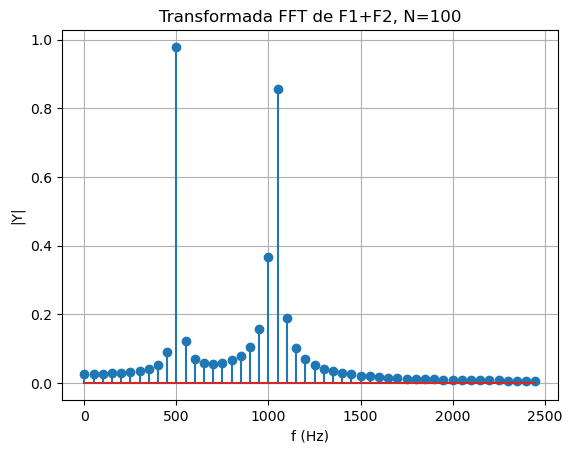

In [16]:
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem (Fs)
T = 1/R     # Espaçamento das Amostras
##
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
yf = (2.0/N) * abs(sp.fft(y)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Transformada FFT de F1+F2, N=100", xl = "f (Hz)")

## Efeito da Resolução da FFT

$S = F_1 + F_2$

N=200

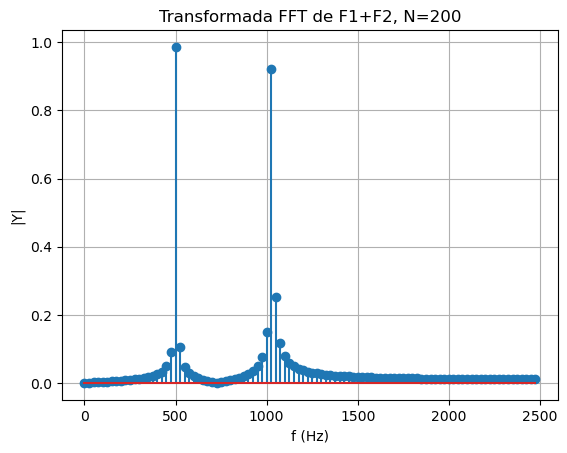

In [15]:
N = 200     # Número de Amostras
R = 5e3     # Frequência de Amostragem (Fs)
T = 1/R     # Espaçamento das Amostras
##
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
yf = (2.0/N) * abs(sp.fft(y)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Transformada FFT de F1+F2, N=200", xl = "f (Hz)")

## $S = F1+F3$

N=100

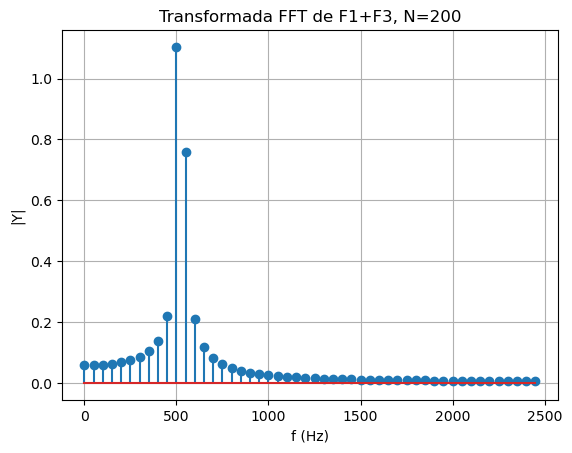

In [17]:
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem (Fs)
T = 1/R     # Espaçamento das Amostras
##
w1 = (500)  * 2*np.pi
w3 = (525)  * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F3 = np.sin(w3*x)
y = F1 + F3
##
yf = (2.0/N) * abs(sp.fft(y)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Transformada FFT de F1+F3, N=200", xl = "f (Hz)")

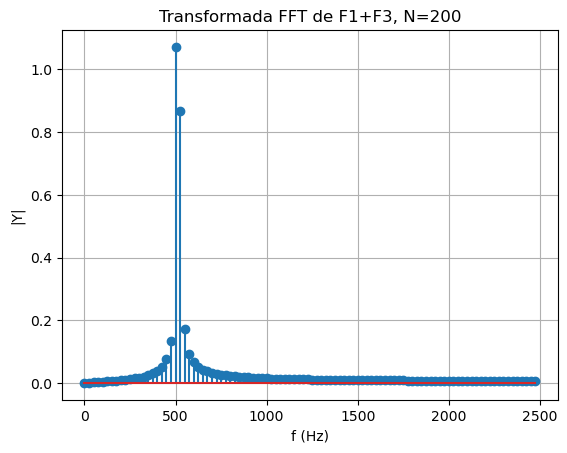

In [13]:
N = 200     # Número de Amostras
R = 5e3     # Frequência de Amostragem (Fs)
T = 1/R     # Espaçamento das Amostras
##
w1 = (500)  * 2*np.pi
w3 = (525)  * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F3 = np.sin(w3*x)
y = F1 + F3
##
yf = (2.0/N) * abs(sp.fft(y)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Transformada FFT de F1+F3, N=200", xl = "f (Hz)")

# Efeitos de Janelamento

- Janela Retangular
- Janela Hamming
- Janela Blackman
- Janela Gaussiana
- Janela Kaiser
  - β = [0, 2.5, 5, 5.5, 6, 7.3, 8.6, 10]

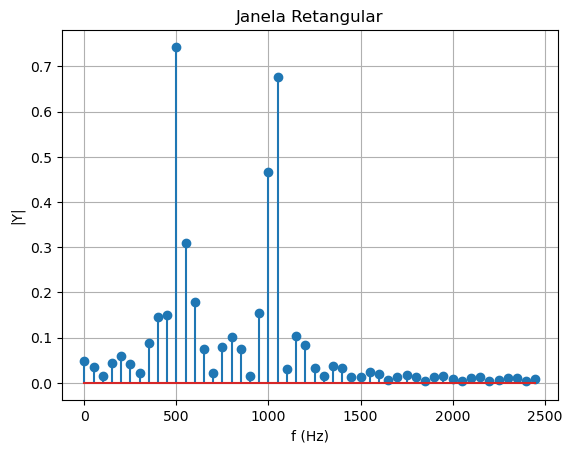

In [129]:
## Retangular
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem
T = 1/R     # Período de Amostragem
J = 25      # Início da Janela
M = N-J-1   # Número de Pontos da Janela

n = np.arange(0, N)
## Sinal
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
## Janela
y_w = apply_window(y, J, N, 'box')
yf = (2.0/N) * abs(sp.fft(y_w)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Janela Retangular", xl = "f (Hz)")

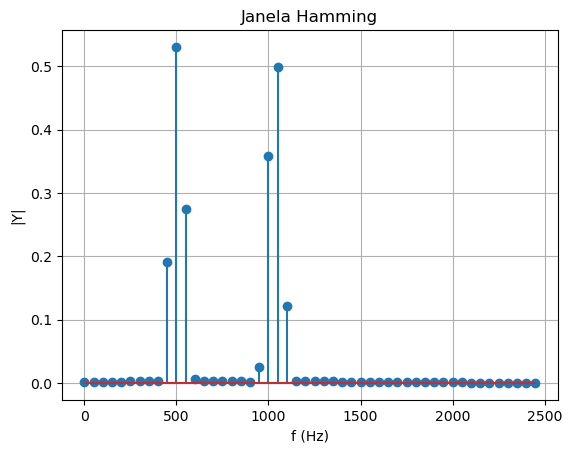

In [133]:
## Hamming
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem
T = 1/R     # Período de Amostragem
J = 0        # Início da Janela

## Sinal
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
## Janela
y_w = apply_window(y, J, N, 'ham')
yf = (2.0/N) * abs(sp.fft(y_w)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Janela Hamming", xl = "f (Hz)")

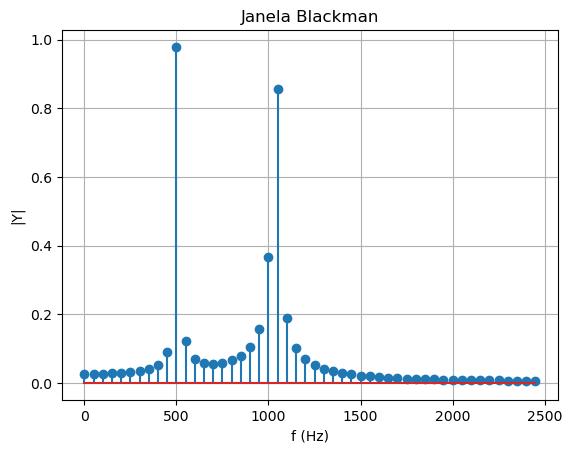

In [132]:
## Blackman
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem
T = 1/R     # Período de Amostragem
J = 0       # Início da Janela

## Sinal
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
## Janela
y_w = apply_window(y, J, N, 'black')
yf = (2.0/N) * abs(sp.fft(y)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Janela Blackman", xl = "f (Hz)")

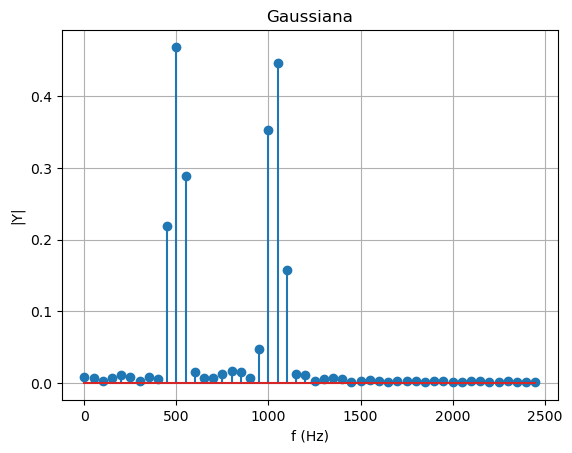

In [142]:
## Gaussiana
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem
T = 1/R     # Período de Amostragem
J = 25      # Início da Janela
M = N-J-1   # Número de Pontos da Janela

## Sinal
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
## Janela
y_w = apply_window(y, J, N, 'gaus', 20)
yf = (2.0/N) * abs(sp.fft(y_w)[0:N//2])
xf = sp.fftfreq(N, T)[:N//2]
plot_stem(xf, yf,title="Gaussiana", xl = "f (Hz)")

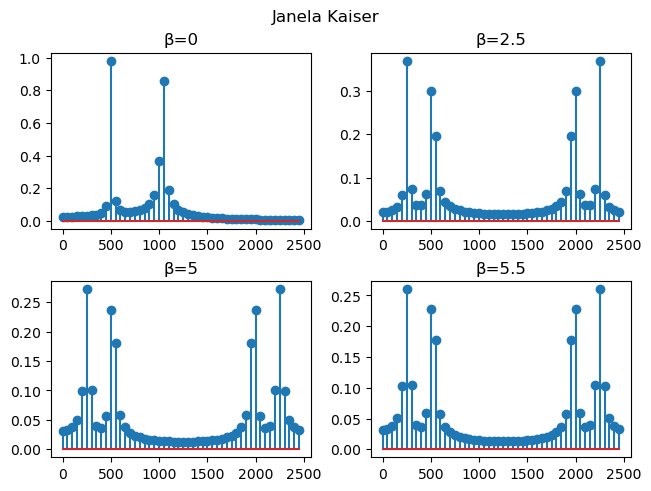

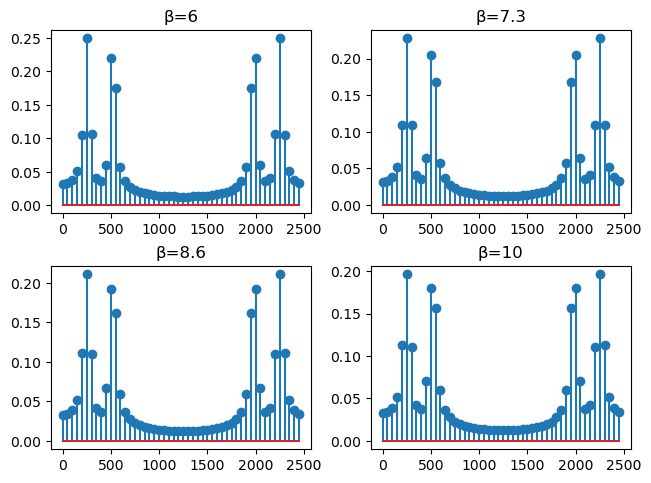

In [148]:
## Kaiser
N = 100     # Número de Amostras
R = 5e3     # Frequência de Amostragem
T = 1/R     # Período de Amostragem
J = 0       # Início da Janela

## Sinal
w1 = (500)  * 2*np.pi
w2 = (1025) * 2*np.pi
x = np.linspace(0, N*T, N)
##
F1 = np.sin(w1*x)
F2 = np.sin(w2*x)
y = F1 + F2
##
## Janela para β = [0, 2.5, 5, 5.5, 6, 7.3, 8.6, 10]
y_w0 = apply_window(y, J, N, 'kaiser', 0)
y_w1 = apply_window(y, J, N, 'kaiser', 2.5)
y_w2 = apply_window(y, J, N, 'kaiser', 5)
y_w3 = apply_window(y, J, N, 'kaiser', 5.5)
y_w4 = apply_window(y, J, N, 'kaiser', 6)
y_w5 = apply_window(y, J, N, 'kaiser', 7.3)
y_w6 = apply_window(y, J, N, 'kaiser', 8.6)
y_w7 = apply_window(y, J, N, 'kaiser', 10)
##
yf0 = (2.0/N) * abs(sp.fft(y_w0)[0:N//2])
xf0 = sp.fftfreq(N, T)[:N//2]
yf1 = (2.0/N) * abs(sp.fft(y_w1[0:N//2]))
xf1 = sp.fftfreq(N, T)[:N//2]
yf2 = (2.0/N) * abs(sp.fft(y_w2[0:N//2]))
xf2 = sp.fftfreq(N, T)[:N//2]
yf3 = (2.0/N) * abs(sp.fft(y_w3[0:N//2]))
xf3 = sp.fftfreq(N, T)[:N//2]
yf4 = (2.0/N) * abs(sp.fft(y_w4[0:N//2]))
xf4 = sp.fftfreq(N, T)[:N//2]
yf5 = (2.0/N) * abs(sp.fft(y_w5[0:N//2]))
xf5 = sp.fftfreq(N, T)[:N//2]
yf6 = (2.0/N) * abs(sp.fft(y_w6[0:N//2]))
xf6 = sp.fftfreq(N, T)[:N//2]
yf7 = (2.0/N) * abs(sp.fft(y_w7[0:N//2]))
xf7 = sp.fftfreq(N, T)[:N//2]
##

plot_4stem([xf0, xf1, xf2, xf3], [yf0, yf1, yf2, yf3], title="Janela Kaiser",
           sp_titles=["β=0", "β=2.5", "β=5", "β=5.5"], xl = "f (Hz)")

plot_4stem([xf4, xf5, xf6, xf7], [yf4, yf5, yf6, yf7],
           sp_titles=["β=6", "β=7.3", "β=8.6", "β=10"], xl = "f (Hz)")

# Analisando Sinais Reais

Flauta: fs =  11025  Hz


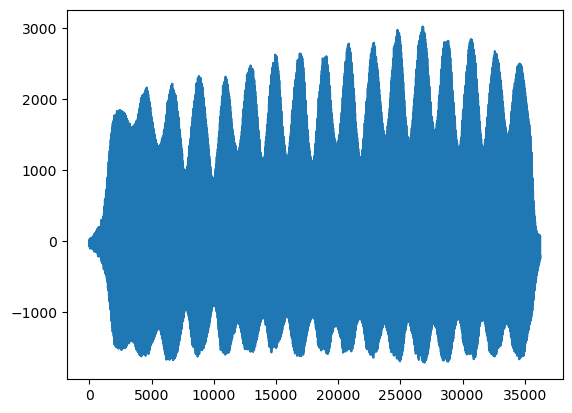

Violino: fs =  11025  Hz


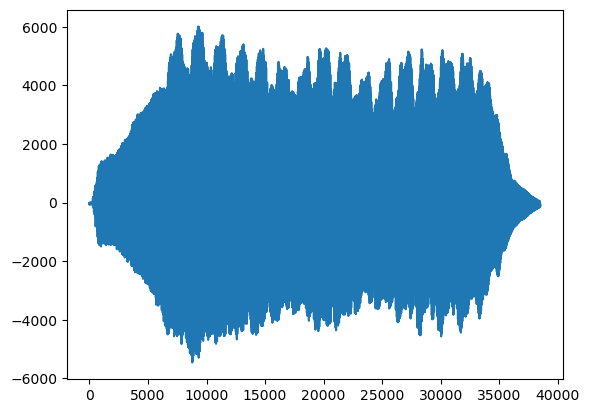

In [5]:
from scipy.io import wavfile as wf

fs, x_flute = wf.read('Sinais/flute-C4.wav')

print("Flauta: fs = ",fs," Hz")   # mostra a frequencia de amostragem

plt.plot(x_flute)
plt.show()

fs, x_violin = wf.read('Sinais/violin-C4.wav')

print("Violino: fs = ",fs," Hz")   # mostra a frequencia de amostragem

plt.plot(x_violin)
plt.show()

Text(0.5, 1.0, 'Sinal Violino C4, Limpo')

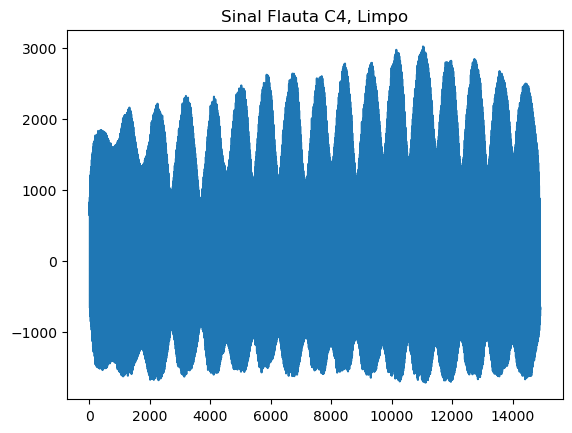

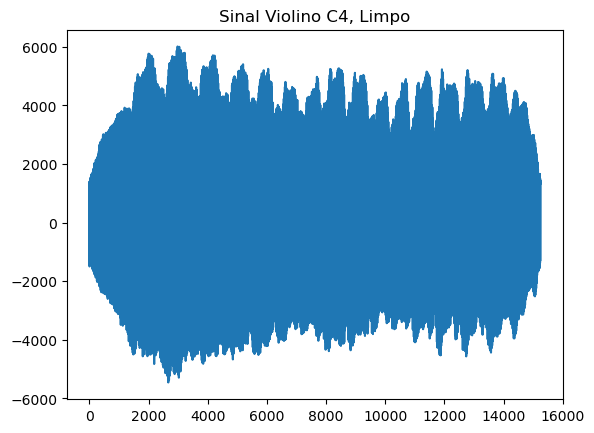

In [21]:
# Limpando o Sinal
clean_flute = x_flute[np.abs(x_flute)>(np.mean(np.abs(x_flute)))]
clean_violin = x_violin[np.abs(x_violin)>(np.mean(np.abs(x_violin)))]
# Plotando Sinal Limpo
fig = plt.figure()
plt.plot(clean_flute)
plt.title("Sinal Flauta C4, Limpo")
fig = plt.figure()
plt.plot(clean_violin)
plt.title("Sinal Violino C4, Limpo")

Nf:  14919 Nv:  15241


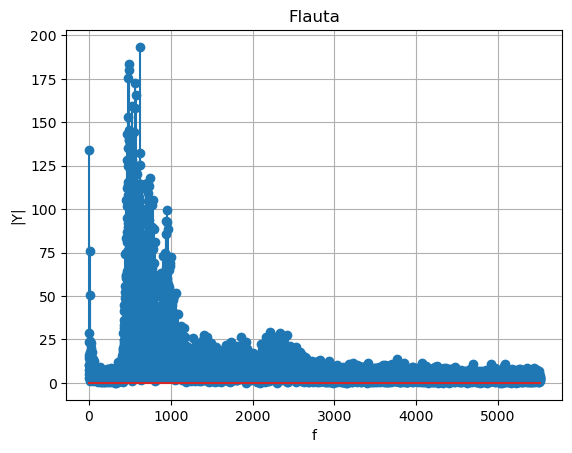

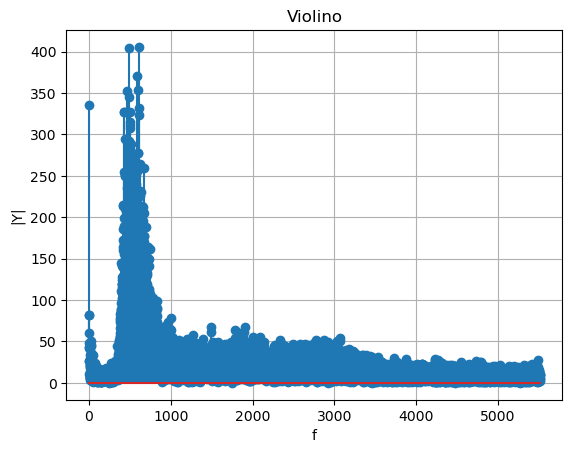

In [51]:
# Analisando Espectro do Sinal
Nf = len(clean_flute)
Nv = len(clean_violin)
T = 1/fs
##
ff = (2.0/Nv) * abs(sp.fft(clean_flute)[0:Nv//2])
fx = sp.fftfreq(Nv, T)[:Nv//2]
vf = (2.0/Nf) * abs(sp.fft(clean_violin)[0:Nf//2])
vx = sp.fftfreq(Nf, T)[:Nf//2]
##
print("Nf: ", Nf, "Nv: ", Nv)
plot_stem(fx, ff, title="Flauta")
plot_stem(vx, vf, title="Violino")

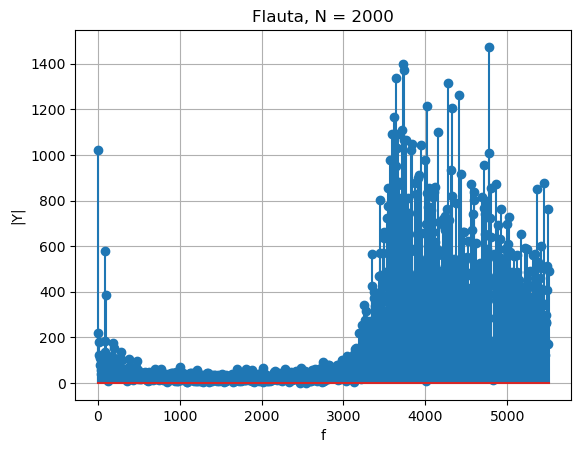

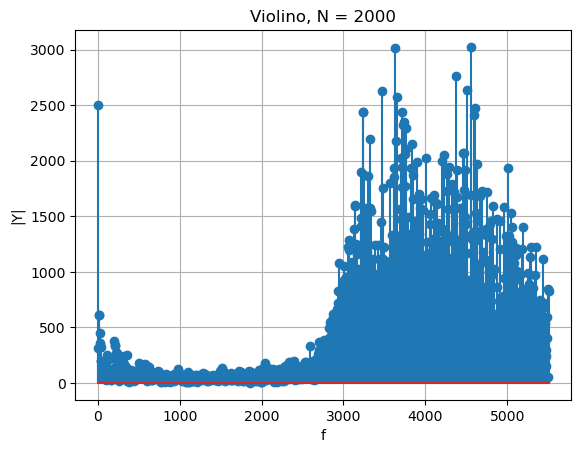

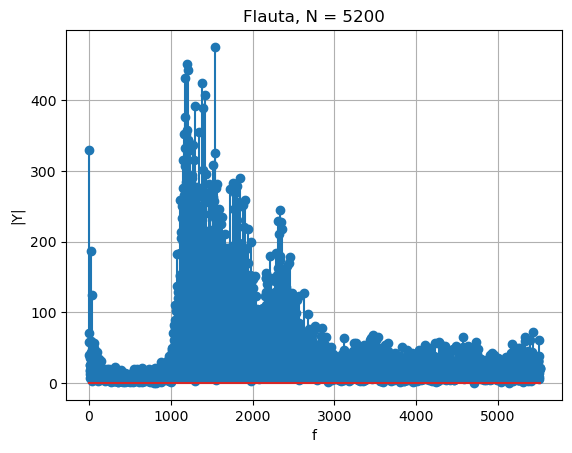

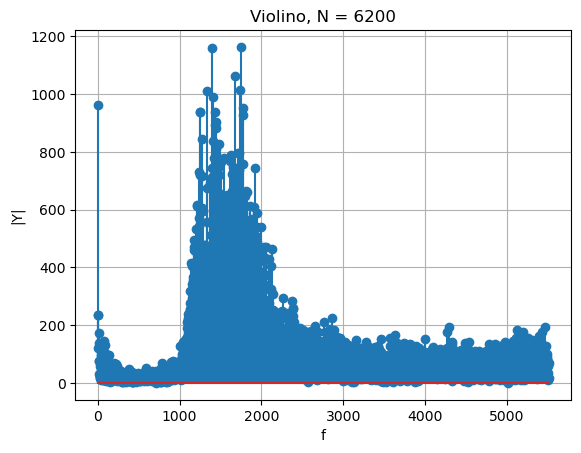

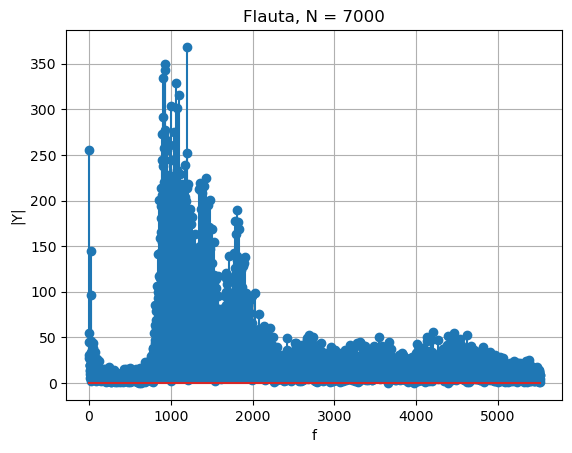

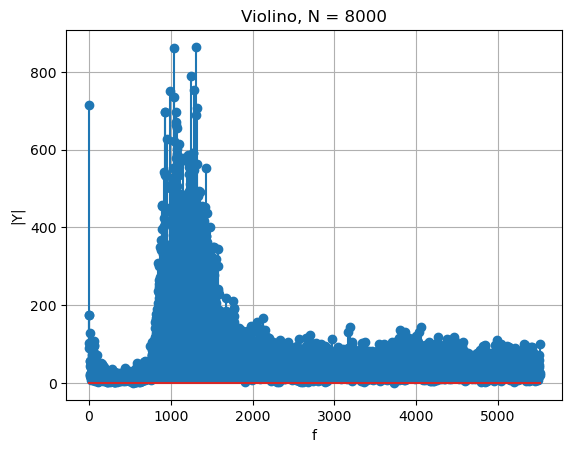

In [53]:
# Analisando Espectro do Sinal para Ns diferentes
## N = dobro da freqeuência de pico
Nf = 2000
Nv = 2000
T = 1/fs
##
ff0 = (2.0/Nv) * np.abs(sp.fft(clean_flute)[0:Nv//2])
fx0 = sp.fftfreq(Nv, T)[:Nv//2]
vf0 = (2.0/Nf) * np.abs(sp.fft(clean_violin)[0:Nf//2])
vx0 = sp.fftfreq(Nf, T)[:Nf//2]
##
plot_stem(fx0, ff0, title="Flauta, N = 2000")
plot_stem(vx0, vf0, title="Violino, N = 2000")
## N = dobro do fim do "platô" da frequência
Nf = 5200
Nv = 6200
##
ff1 = (2.0/Nv) * np.abs(sp.fft(clean_flute)[0:Nv//2])
fx1 = sp.fftfreq(Nv, T)[:Nv//2]
vf1 = (2.0/Nf) * np.abs(sp.fft(clean_violin)[0:Nf//2])
vx1 = sp.fftfreq(Nf, T)[:Nf//2]
##
plot_stem(fx1, ff1, title="Flauta, N = 5200")
plot_stem(vx1, vf1, title="Violino, N = 6200")
## N = dobro do fim do "platô" da frequência com margem de segurança
Nf = 7000
Nv = 8000
##
ff1 = (2.0/Nv) * np.abs(sp.fft(clean_flute)[0:Nv//2])
fx1 = sp.fftfreq(Nv, T)[:Nv//2]
vf1 = (2.0/Nf) * np.abs(sp.fft(clean_violin)[0:Nf//2])
vx1 = sp.fftfreq(Nf, T)[:Nf//2]
##
plot_stem(fx1, ff1, title="Flauta, N = 7000")
plot_stem(vx1, vf1, title="Violino, N = 8000")

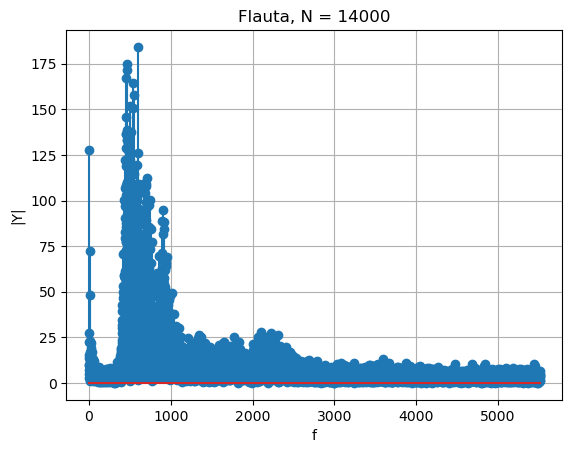

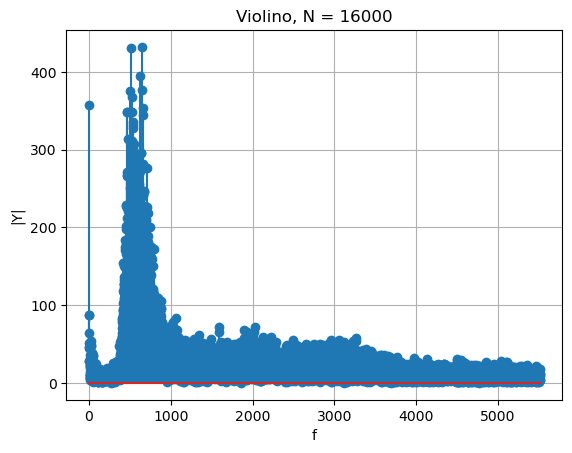

In [56]:
Nf = 14000
Nv = 16000
##
ff1 = (2.0/Nv) * np.abs(sp.fft(clean_flute)[0:Nv//2])
fx1 = sp.fftfreq(Nv, T)[:Nv//2]
vf1 = (2.0/Nf) * np.abs(sp.fft(clean_violin)[0:Nf//2])
vx1 = sp.fftfreq(Nf, T)[:Nf//2]
##
plot_stem(fx1, ff1, title="Flauta, N = 14000")
plot_stem(vx1, vf1, title="Violino, N = 16000")